In [17]:
import nengo
import numpy as np
import pylab as plt

from nengo_extras.plot_spikes import (
    cluster,
    merge,
    plot_spikes,
    preprocess_spikes,
    sample_by_variance,
)

%matplotlib widget

In [ ]:
# Use NxSDK backend on Loihi
import nengo_loihi
nengo_loihi.set_defaults()

In [27]:
def input_func(t):
    return [5*np.sin(t), 5*np.cos(t), t]

with nengo.Network(label="Control") as model:
    inp = nengo.Node(output=input_func)
    ens = nengo.Ensemble(n_neurons=100, dimensions=3, neuron_type=nengo.LIF())
    nengo.Connection(inp, ens)
    p = nengo.Probe(ens, synapse=0.01)
    x_spikes = nengo.Probe(ens.neurons[0])
    y_spikes = nengo.Probe(ens.neurons[1])
    z_spikes = nengo.Probe(ens.neurons[2])

In [24]:
with nengo.Simulator(model, seed=0) as sim:
    sim.run(10)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [ ]:
with nengo_loihi.Simulator(model, seed=1, dt=1e-3) as sim:
    sim.run(10)
t = sim.trange()

Text(0.5, 0.98, 'Motor Neuron Spikes')

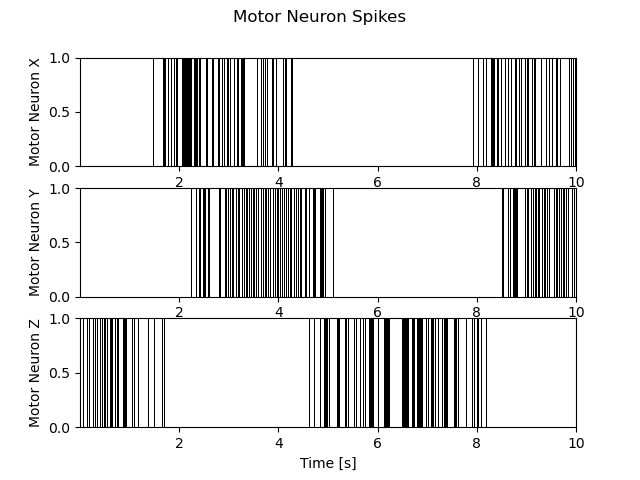

In [48]:
plt.figure()

plt.subplot(3, 1, 1)
plot_spikes(sim.trange(), sim.data[x_spikes])
plt.ylabel("Motor Neuron X")
plt.subplot(3, 1, 2)
plot_spikes(sim.trange(), sim.data[y_spikes])
plt.ylabel("Motor Neuron Y")
plt.subplot(3, 1, 3)
plot_spikes(sim.trange(), sim.data[z_spikes])
plt.ylabel("Motor Neuron Z")
plt.xlabel("Time [s]")
plt.suptitle("Motor Neuron Spikes")

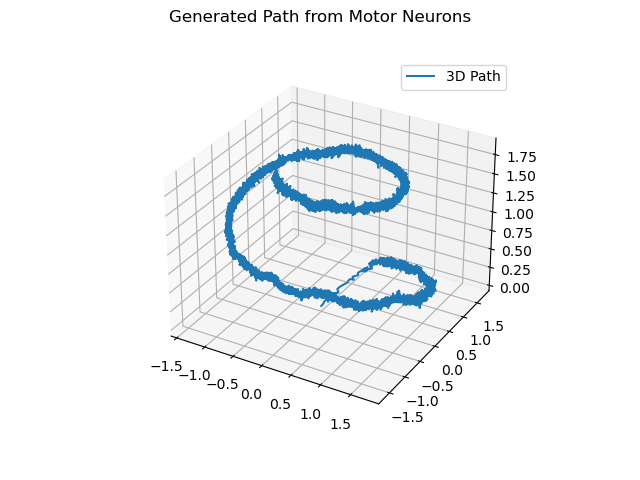

In [52]:
import numpy as np
import matplotlib.pyplot as plt


ax = plt.figure().add_subplot(projection='3d')

data = sim.data[p]
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

ax.plot(x, y, z, label='3D Path')
ax.legend()

plt.suptitle("Generated Path from Motor Neurons")
plt.show()